# Realistic Motion of a Baseball: Quadratic Air Resistance and Spin

Import useful modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background') # you can comment out this line if you are not using a dark background

Define the ODE solver of choice (but feel free to experiment with others if you like)

In [10]:
def RK2(diffeq,dof,dt):
    """
    Runge-Kutta second order method for ODEs:
    Given the degrees of freedom at time t
    Returns the degrees of freedom at time t+dt
    """
    k1=dt*diffeq(dof)
    k2=dt*diffeq(dof+0.5*k1)
    return dof+k2

Assignment 3A: complete the function to return the righthand-sides of the differential equations associated with the quadratic drag (Eqs. 3.34 of the textbook).

In [ ]:
def quadratic_drag(dof):
    """
    """
    speed=np.sqrt(dof[2]**2+dof[3]**2)
    b2=air_density*baseball_area*Cd*0.5
    ddofdt=np.zeros(4)
    ddofdt[0]=
    ddofdt[1]=
    ddofdt[2]=
    ddofdt[3]=
    return ddofdt

Setup the parameters of the simulation

In [ ]:
v0=45. # initial speed in m/s
theta=np.pi/6. # launching angle in rad
dof0=[0.,0.,v0*np.cos(theta),v0*np.sin(theta)] # initial position and velocity of the projectile
a=-9.8 # acceleration due to gravity
m = 0.145 # baseball mass in kg 
Cd = 0.5 # constant drag coefficient of a sphere
baseball_radius = 3.65e-2 # in m
baseball_area = np.pi*baseball_radius**2
air_density = 1.225 # in kg/m^3

In [ ]:
dt = 0.001 # This controls the accuracy of the algorithm
times=[0.] # Setup a container to store the times along the trajectory
lenghts=[dof0[0]] # Setup a container to store the horizontal position along the trajectory
heights=[dof0[0]] # Setup a container to store the vertical position along the trajectory
dof=dof0.copy() # we copy the initial conditions, as we don't want to overwrite them, we may use them in the following. 
# note that in the above we use the array.copy() method, as the = operator has a different meaning for arrays
while True: # this is an infinite loop, make sure you break it somewhere
    dof=RK2(quadratic_drag,dof,dt)
    if dof[1] < 0. : break # when the ball reaches the floor, exit the loop
    lenghts.append(dof[0]) # otherwise, save the position of the ball
    heights.append(dof[1]) # otherwise, save the position of the ball
    times.append(times[-1]+dt) # and the corresponding time

Assignment 3B: using the following implementation of the drag coefficient $C_d$ as a function of the speed of the ball, implement a new simulation for variable quadratic drag.

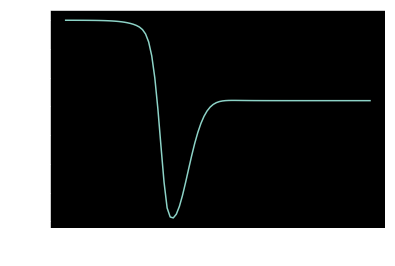

In [8]:
def baseball_Cd(v):
    """
    Variable drag coefficient Cd(v) of a baseball as a function of its speed
    Eq. 3.8 of the textbook
    """
    a=0.36
    b=0.14
    c=0.27
    vc=34 # critical velocity in m/s
    chi=(v-vc)/4.
    gauss=np.exp(-chi**2/4)*(chi>0)+np.exp(-chi**2)*(chi<=0) # this is compatible with v being a numpy array
    return a + b / ( 1 + np.exp(chi) ) - c * gauss

v=np.linspace(0.,100.,100)
plt.plot(v,baseball_Cd(v))
plt.xlabel('speed in m/s')
plt.ylabel('Cd')
plt.show()

HINT: in the function below use the baseball_Cd(speed) function

In [5]:
def variable_drag(dof):
    """
    """
    speed=np.sqrt(dof[2]**2+dof[3]**2)
    ddofdt=np.zeros(4)
    ddofdt[0]=
    ddofdt[1]=
    ddofdt[2]=
    ddofdt[3]=
    return ddofdt

SyntaxError: invalid syntax (<ipython-input-5-a8f674679b58>, line 7)

Run the simulation with variable drug and compare its results with the cases with constant drag and with no drag. NOTE: you can change the names of the variables in these blocks so that you don't overwrite previous simulations and you can plot results of different blocks together. 

In [ ]:
dt = 0.001 # This controls the accuracy of the algorithm
times=[0.] # Setup a container to store the times along the trajectory
lenghts=[dof0[0]] # Setup a container to store the horizontal position along the trajectory
heights=[dof0[0]] # Setup a container to store the vertical position along the trajectory
dof=dof0.copy() # we copy the initial conditions, as we don't want to overwrite them, we may use them in the following. 
# note that in the above we use the array.copy() method, as the = operator has a different meaning for arrays
while True: # this is an infinite loop, make sure you break it somewhere
    dof=RK2(variable_drag,dof,dt)
    if dof[1] < 0. : break # when the ball reaches the floor, exit the loop
    lenghts.append(dof[0]) # otherwise, save the position of the ball
    heights.append(dof[1]) # otherwise, save the position of the ball
    times.append(times[-1]+dt) # and the corresponding time

Assignment 3C (Optional): Implement the most general differential equation that also includes the Magnus force. Assume that the spin rotation axis is perpendicular to the xy plane, i.e. the Magnus force and the trajectory are still in the xy plane. First define the additional parameters of the simulation

In [9]:
alpha = 5.e-5 # constant Magnus coefficient in kg
omega = 200 # in rad/s

Then complete the differential equations

In [ ]:

def baseball(dof):
    """
    """
    speed=np.sqrt(dof[2]**2+dof[3]**2)
    ddofdt=np.zeros(4)
    ddofdt[0]=
    ddofdt[1]=
    ddofdt[2]=
    ddofdt[3]=
    return ddofdt

Eventually, run the simulation and compare the results with the ones with no spin.